In [ ]:
'''
Engine: TensorFlow
NN Type: None - Linear Regression Example
'''

In [4]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import pandas as pd
rng = numpy.random

In [5]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [7]:
df = pd.read_csv('/Users/austinwhaley/Desktop/DSI-SF-4-austinmwhaley/datasets/housing_regression/housing.csv')

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# Training Data
train_X = numpy.array(df['GrLivArea'])
train_Y = numpy.array(df['SalePrice'])
n_samples = train_X.shape[0]
print n_samples, '<= # of rows'

1460 <= # of rows


In [12]:
'''
We are telling our Computational Graph that we are goign to have 2 variables (X & Y)
In addition to declaring the variables, we are setting the default weights of our variables
'''
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [15]:
'''Raw Formula for Linear Regression'''
# Construct a linear model
pred = tf.add(tf.mul(X, W), b)
'''Define our cost function'''
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
'''Define our optimization function'''
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
'''Initialize variables'''
# Initializing the variables
init = tf.initialize_all_variables()

Epoch: 0050 cost= nan W= nan b= nan
Epoch: 0100 cost= nan W= nan b= nan
Epoch: 0150 cost= nan W= nan b= nan
Epoch: 0200 cost= nan W= nan b= nan
Epoch: 0250 cost= nan W= nan b= nan
Epoch: 0300 cost= nan W= nan b= nan
Epoch: 0350 cost= nan W= nan b= nan
Epoch: 0400 cost= nan W= nan b= nan
Epoch: 0450 cost= nan W= nan b= nan
Epoch: 0500 cost= nan W= nan b= nan
Epoch: 0550 cost= nan W= nan b= nan
Epoch: 0600 cost= nan W= nan b= nan
Epoch: 0650 cost= nan W= nan b= nan
Epoch: 0700 cost= nan W= nan b= nan
Epoch: 0750 cost= nan W= nan b= nan
Epoch: 0800 cost= nan W= nan b= nan
Epoch: 0850 cost= nan W= nan b= nan
Epoch: 0900 cost= nan W= nan b= nan
Epoch: 0950 cost= nan W= nan b= nan
Epoch: 1000 cost= nan W= nan b= nan
Optimization Finished!
Training cost= nan W= nan b= nan 



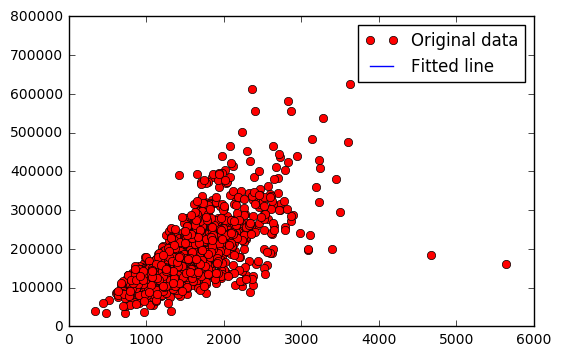

In [17]:
'''


'''
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        
        
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()